In [21]:
import pandas as pd
import os

# Load the provided CSV file to inspect its contents
path = os.path.join('..','results','merged_data.csv')
data = pd.read_csv(path)

# Get an initial idea of the structure of the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007123 entries, 0 to 1007122
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Time stamp  1007123 non-null  object
 1   Value       1007123 non-null  object
 2   Variable    1007123 non-null  object
dtypes: object(3)
memory usage: 23.1+ MB


,Time stamp,Value,Variable
0,07/07/2023 10:41:03,"491,00",TR2_Pot_att
1,07/07/2023 10:26:03,"498,00",TR2_Pot_att
2,07/07/2023 10:11:03,"498,00",TR2_Pot_att
3,07/07/2023 09:56:03,"538,00",TR2_Pot_att
4,07/07/2023 09:41:03,"505,00",TR2_Pot_att


Preprocessing the data

In [22]:
# Parsing 'Time stamp' into a datetime object
data['Time stamp'] = pd.to_datetime(data['Time stamp'], format='%d/%m/%Y %H:%M:%S')

# Converting 'Value' column to numerical format, replacing dots with nothing, commas with dots
data['Value'] = data['Value'].str.replace('.','',regex=False).str.replace(',', '.').astype(float)

# Display the updated dataframe to confirm changes
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007123 entries, 0 to 1007122
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Time stamp  1007123 non-null  datetime64[ns]
 1   Value       1007123 non-null  float64       
 2   Variable    1007123 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.1+ MB


,Time stamp,Value,Variable
0,2023-07-07 10:41:03,491.0,TR2_Pot_att
1,2023-07-07 10:26:03,498.0,TR2_Pot_att
2,2023-07-07 10:11:03,498.0,TR2_Pot_att
3,2023-07-07 09:56:03,538.0,TR2_Pot_att
4,2023-07-07 09:41:03,505.0,TR2_Pot_att


In [23]:
# Group by Variable and Time stamp (day) and calculate the mean of Value
data_day_mean = data

data_day_mean['Day'] = data_day_mean['Time stamp'].dt.date
data_day_mean = data_day_mean.groupby(['Day', 'Variable']).mean('Value').reset_index()

data_day_mean.head()

,Day,Variable,Value
0,2022-01-06,TR1_Corr_1,626.222222
1,2022-01-06,TR1_Corr_2,650.818182
2,2022-01-06,TR1_Corr_3,602.454545
3,2022-01-06,TR1_Corr_N,28.250000
4,2022-01-06,TR1_Pot_att,437.230769


Group similar variables based on their names and plot them

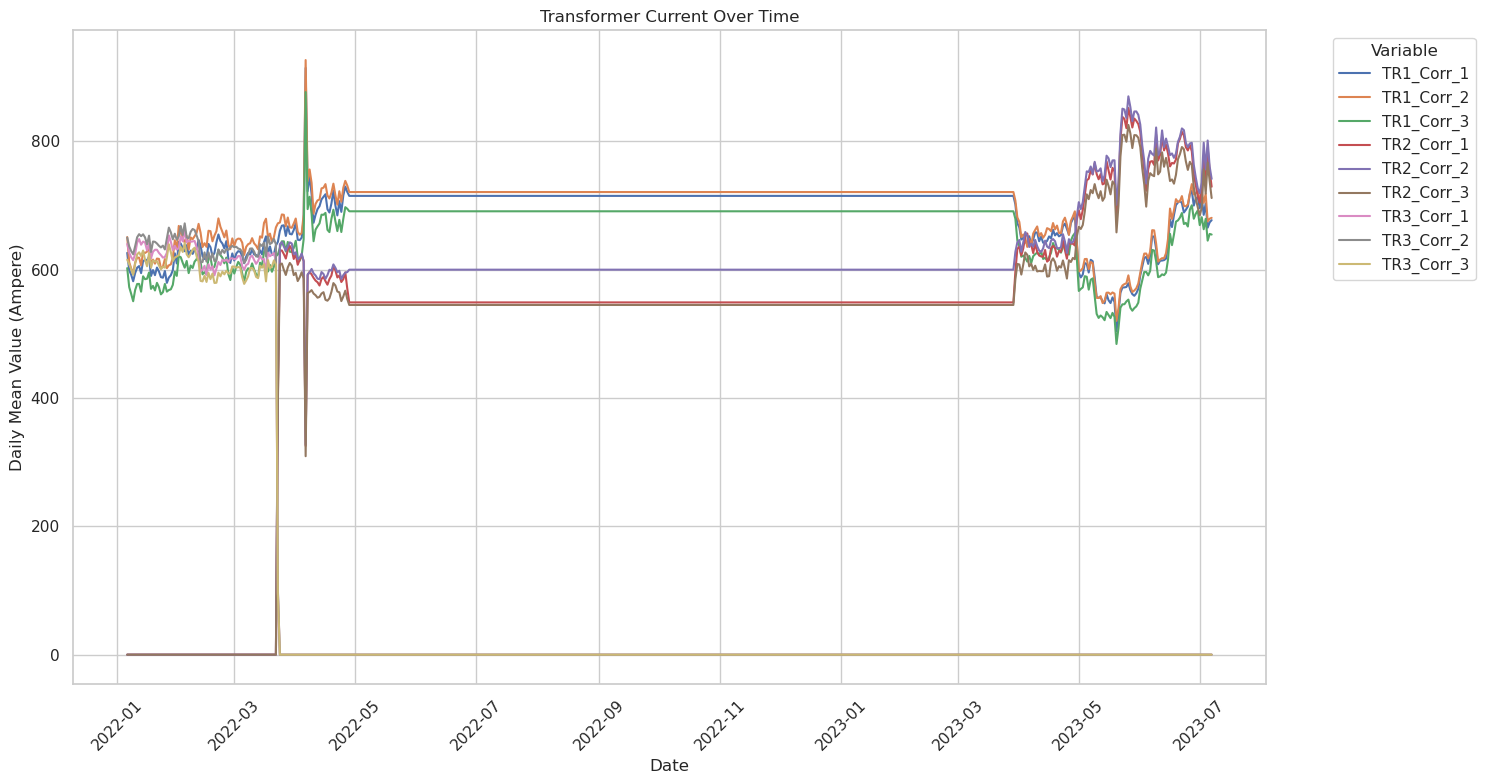

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

variables = data_day_mean['Variable'].unique()

corr123_variables = [var for var in variables if var.startswith('TR') and 'Corr' in var and not var.endswith('N')]
for variable in corr123_variables:
    subset = data_day_mean[data_day_mean['Variable'] == variable]
    plt.plot(subset['Day'], subset['Value'], label=variable)

plt.xlabel('Date')
plt.ylabel('Daily Mean Value (Ampere)')
plt.title('Transformer Current Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

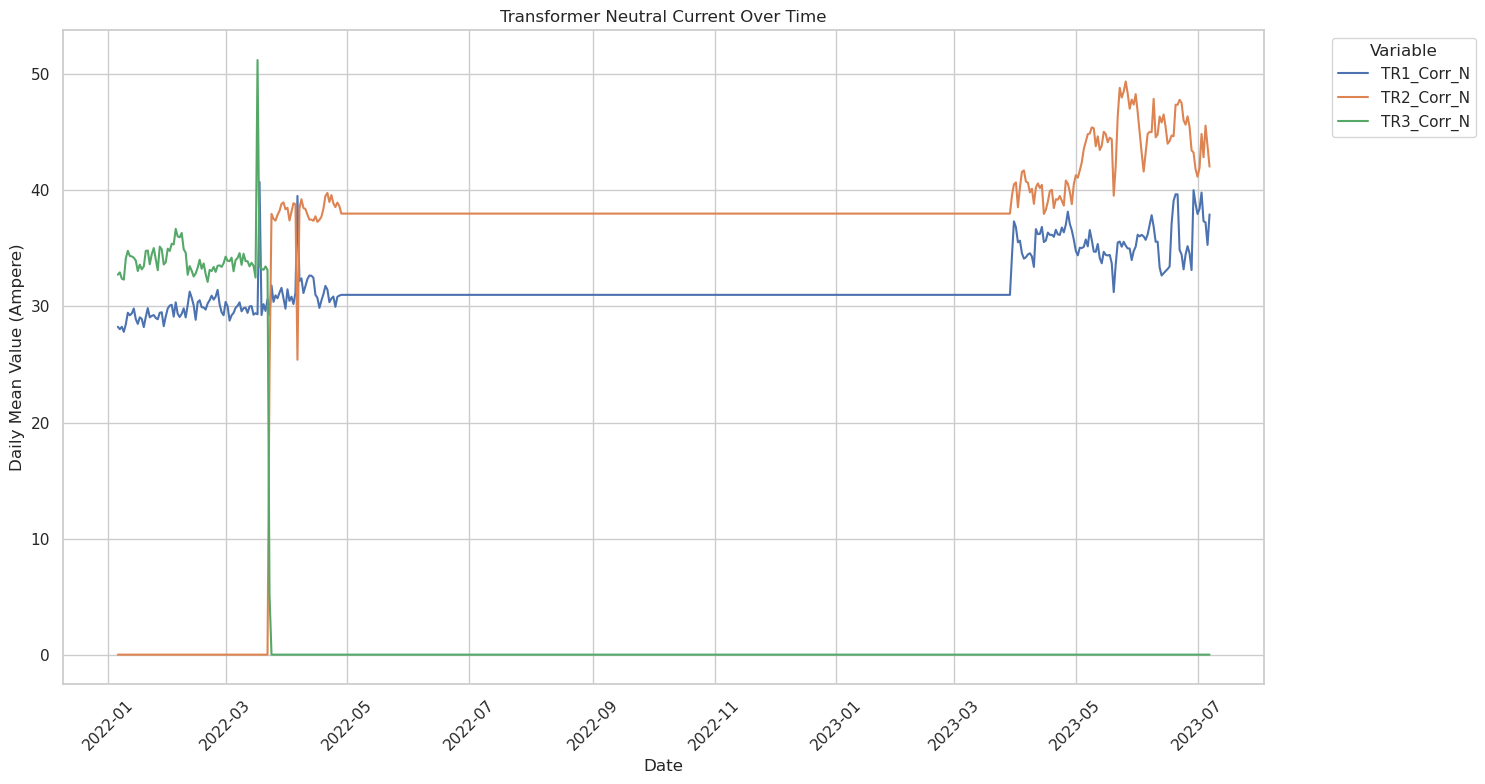

In [47]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

trN_variables = [var for var in variables if var.startswith('TR') and var.endswith('N')]
for variable in trN_variables:
    subset = data_day_mean[data_day_mean['Variable'] == variable]
    plt.plot(subset['Day'], subset['Value'], label=variable)

plt.xlabel('Date')
plt.ylabel('Daily Mean Value (Ampere)')
plt.title('Transformer Neutral Current Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

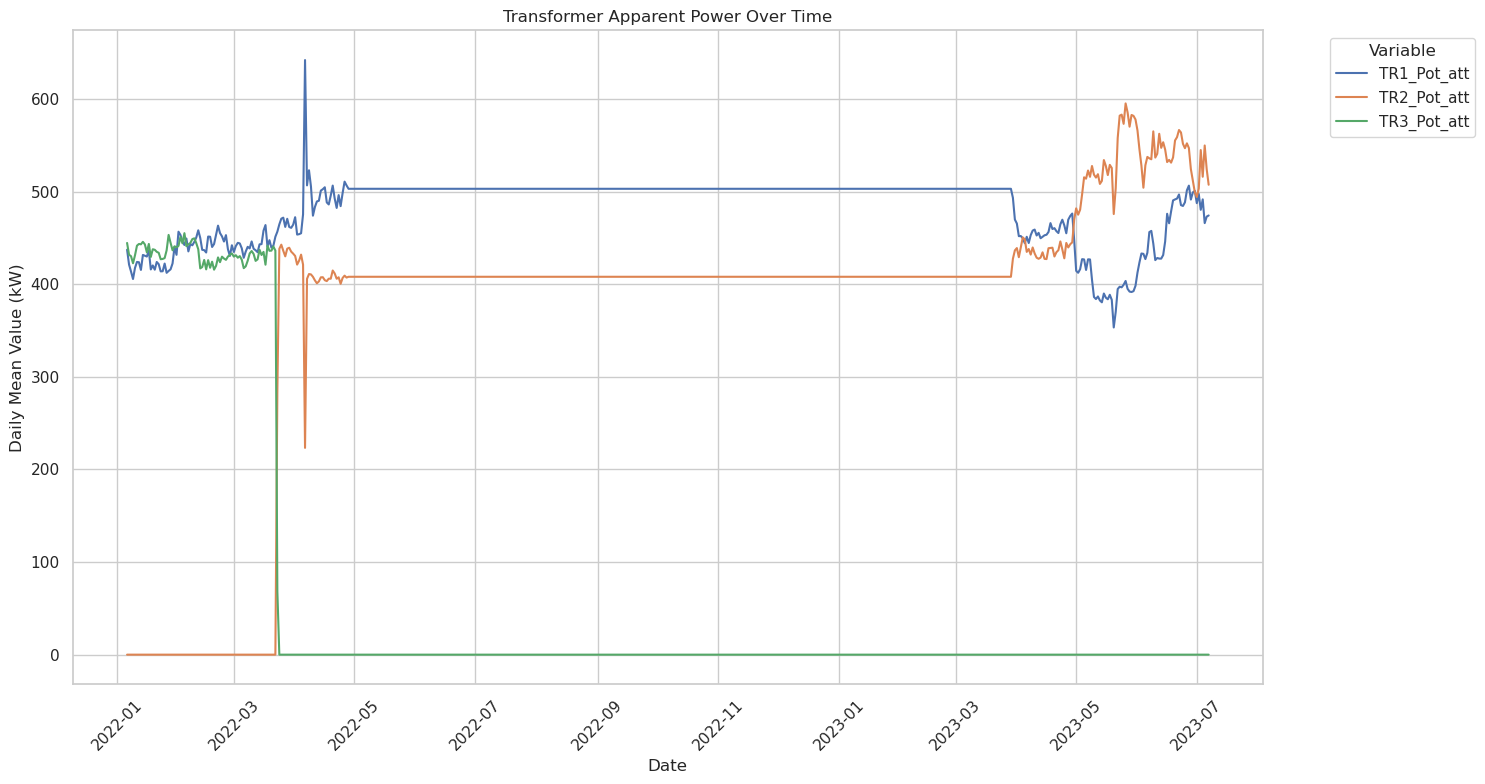

In [46]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

pot_variables = [var for var in variables if 'Pot_att' in var]
for variable in pot_variables:
    subset = data_day_mean[data_day_mean['Variable'] == variable]
    plt.plot(subset['Day'], subset['Value'], label=variable)

plt.xlabel('Date')
plt.ylabel('Daily Mean Value (kW)')
plt.title('Transformer Apparent Power Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

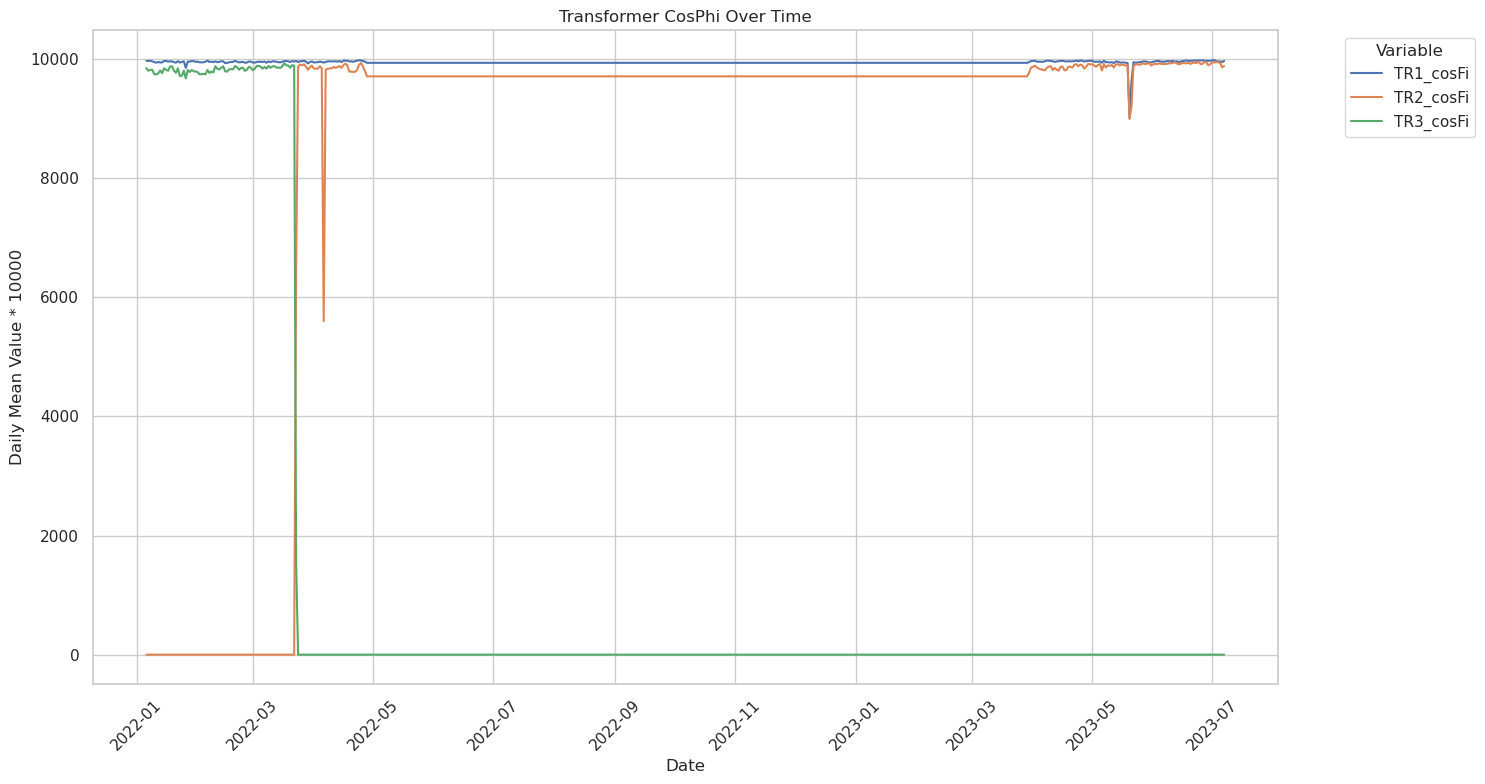

In [27]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

cosfi = [var for var in variables if var.endswith('cosFi')]
for variable in cosfi:
    subset = data_day_mean[data_day_mean['Variable'] == variable]
    plt.plot(subset['Day'], subset['Value'], label=variable)

plt.xlabel('Date')
plt.ylabel('Daily Mean Value * 10000')
plt.title('Transformer CosPhi Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

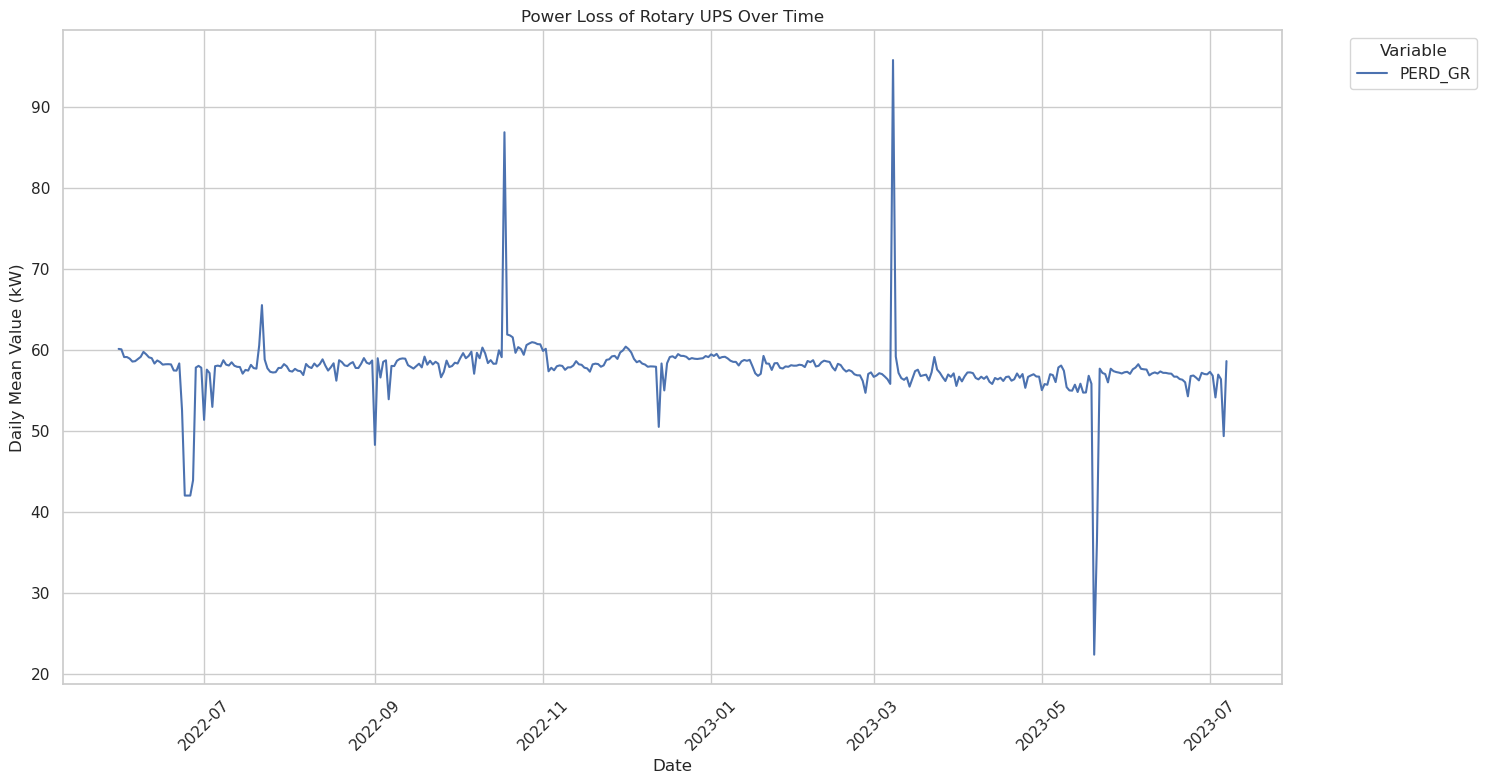

In [28]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

perd_gr = data_day_mean[data_day_mean['Variable'] == 'PERD_GR']
plt.plot(perd_gr['Day'], perd_gr['Value'], label='PERD_GR')

plt.xlabel('Date')
plt.ylabel('Daily Mean Value (kW)')
plt.title('Power Loss of Rotary UPS Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

We can drop the following variable, since it's the sum of other variables in the dataset and there's only data for it for 2 months

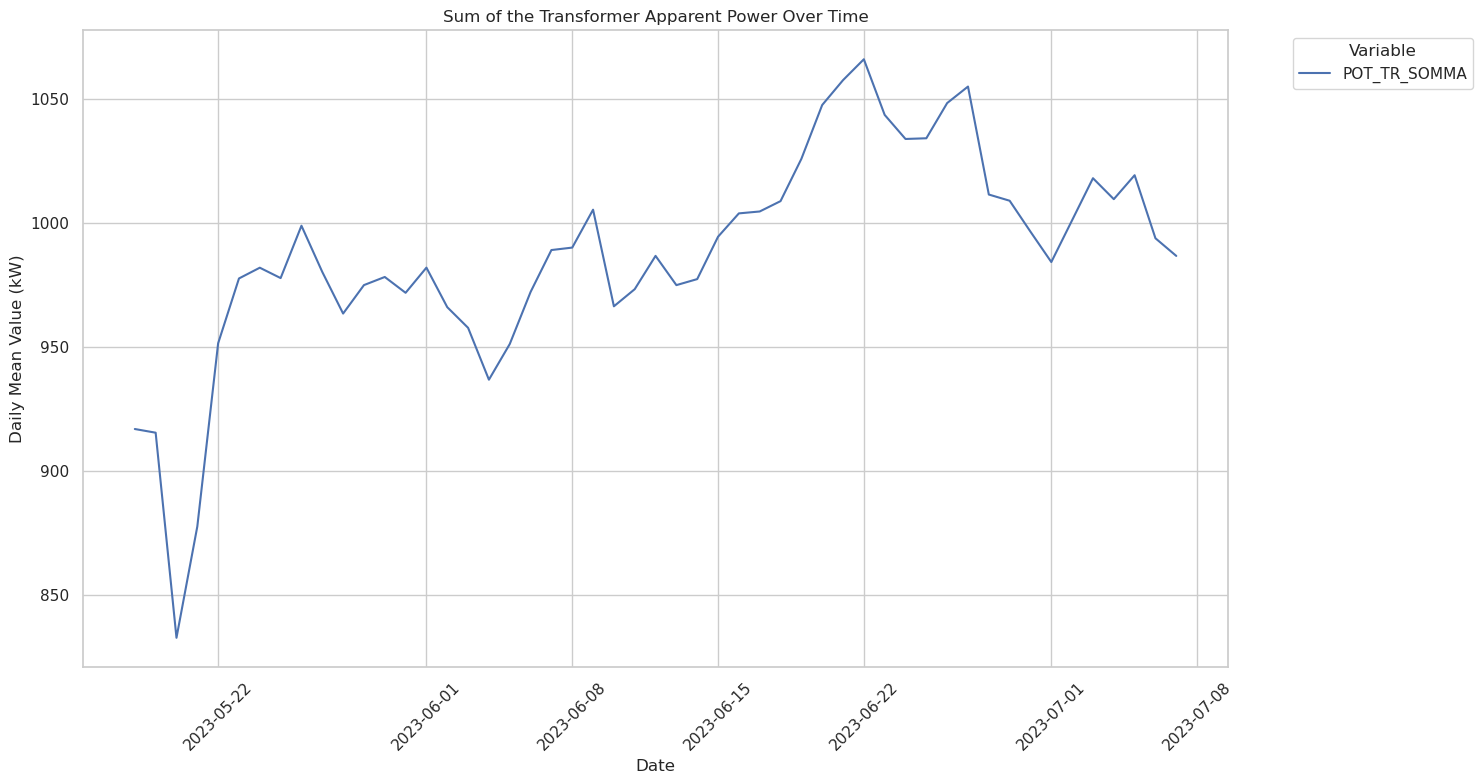

In [29]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

somma = data_day_mean[data_day_mean['Variable'] == 'POT_TR_SOMMA']
plt.plot(somma['Day'], somma['Value'], label='POT_TR_SOMMA')

plt.xlabel('Date')
plt.ylabel('Daily Mean Value (kW)')
plt.title('Sum of the Transformer Apparent Power Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Standardize selected variables

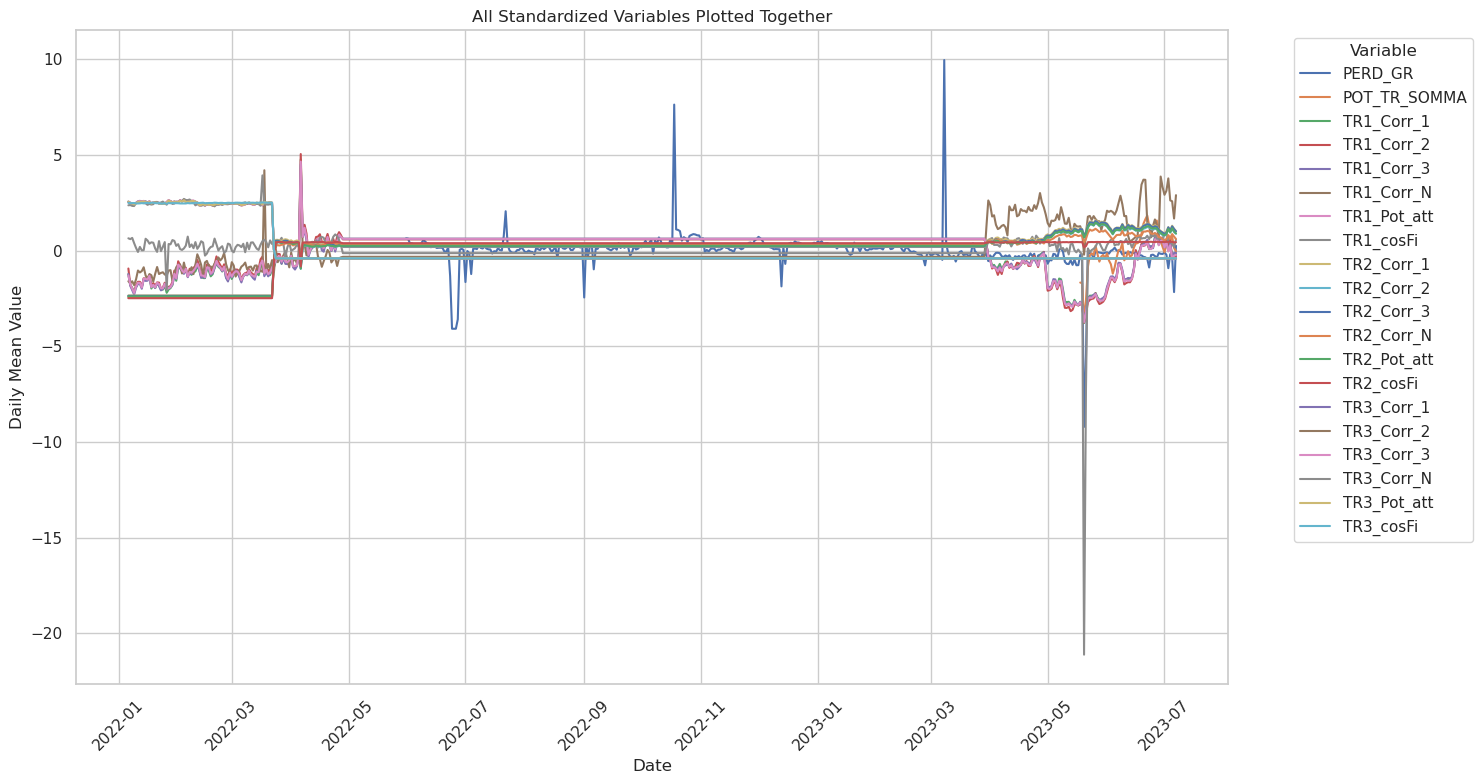

In [30]:
from sklearn.preprocessing import StandardScaler

# Grouping the data by 'Variable'
grouped_data = data_day_mean.groupby('Variable')

# Initializing an empty dataframe to hold the standardized data
standardized_data = pd.DataFrame()

scaler = StandardScaler()

# Standardizing the 'Value' for each group
for name, group in grouped_data:
    group['Standardized Value'] = scaler.fit_transform(group[['Value']])
    standardized_data = pd.concat([standardized_data, group])

standardized_data

# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

variables = standardized_data['Variable'].unique()

for variable in variables:
    subset = standardized_data[standardized_data['Variable'] == variable]
    plt.plot(subset['Day'], subset['Standardized Value'], label=variable)

plt.xlabel('Date')
plt.ylabel('Daily Mean Value')
plt.title('All Standardized Variables Plotted Together')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Reshape the dataset from long to wide format

In [31]:
wide_standardized = standardized_data.pivot(index='Day', columns='Variable', values='Standardized Value').reset_index()

wide_standardized

Variable,Day,PERD_GR,POT_TR_SOMMA,TR1_Corr_1,TR1_Corr_2,TR1_Corr_3,TR1_Corr_N,TR1_Pot_att,TR1_cosFi,TR2_Corr_1,...,TR2_Corr_3,TR2_Corr_N,TR2_Pot_att,TR2_cosFi,TR3_Corr_1,TR3_Corr_2,TR3_Corr_3,TR3_Corr_N,TR3_Pot_att,TR3_cosFi
0,2022-01-06,NaN,NaN,-1.231298,-0.933498,-1.223404,-1.600095,-1.292598,0.646569,-2.341407,...,-2.361081,-2.449617,-2.390089,-2.485613,2.569779,2.545060,2.534740,2.370580,2.563919,2.498133
1,2022-01-07,NaN,NaN,-1.795391,-1.784379,-1.840692,-1.696996,-1.760198,0.603159,-2.341407,...,-2.361081,-2.449617,-2.390089,-2.485613,2.506628,2.483190,2.500779,2.387237,2.478809,2.485275
2,2022-01-08,NaN,NaN,-1.939701,-1.994978,-2.060963,-1.600095,-1.978692,0.666575,-2.341407,...,-2.361081,-2.449617,-2.390089,-2.485613,2.473594,2.449704,2.464601,2.341381,2.468522,2.489890
3,2022-01-09,NaN,NaN,-2.151832,-2.166259,-2.300567,-1.803588,-2.212015,0.394216,-2.341407,...,-2.361081,-2.449617,-2.390089,-2.485613,2.452700,2.427270,2.422261,2.334326,2.417645,2.489911
4,2022-01-10,NaN,NaN,-1.887047,-1.797936,-1.935404,-1.498349,-1.863998,0.144100,-2.341407,...,-2.361081,-2.449617,-2.390089,-2.485613,2.498309,2.484040,2.504258,2.489532,2.474847,2.468301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2023-07-03,-0.916888,0.708592,0.000462,0.223319,0.038344,3.777928,-0.040692,0.440832,1.226710,...,1.218077,0.814704,1.140090,0.462033,-0.402009,-0.402037,-0.401994,-0.401177,-0.402055,-0.402153
544,2023-07-04,-0.180669,0.510244,0.369686,0.529728,0.379178,2.629648,0.285839,0.448404,1.070755,...,1.039245,0.668427,0.953332,0.461576,-0.402009,-0.402037,-0.401994,-0.401177,-0.402055,-0.402153
545,2023-07-05,-0.330154,0.737084,-0.414483,-0.404863,-0.330946,2.581197,-0.458917,0.357539,1.302405,...,1.268306,0.867000,1.172150,0.457968,-0.402009,-0.402037,-0.401994,-0.401177,-0.402055,-0.402153
546,2023-07-06,-2.165179,0.139724,-0.241571,-0.313347,-0.112630,1.680015,-0.254949,0.182434,1.138039,...,1.131274,0.740429,1.007057,0.436132,-0.402009,-0.402037,-0.401994,-0.401177,-0.402055,-0.402153


Correlation matrix of all variables except the removed one

In [32]:
wide_standardized_nosomma = wide_standardized.drop('POT_TR_SOMMA', axis=1)

wide_standardized_nosomma.corr()

/tmp/ipykernel_28585/1563161639.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wide_standardized_nosomma.corr()


Variable,PERD_GR,TR1_Corr_1,TR1_Corr_2,TR1_Corr_3,TR1_Corr_N,TR1_Pot_att,TR1_cosFi,TR2_Corr_1,TR2_Corr_2,TR2_Corr_3,TR2_Corr_N,TR2_Pot_att,TR2_cosFi,TR3_Corr_1,TR3_Corr_2,TR3_Corr_3,TR3_Corr_N,TR3_Pot_att,TR3_cosFi
Variable,,,,,,,,,,,,,,,,,,,
PERD_GR,1.000000,0.295472,0.287289,0.292566,-0.164748,0.292697,0.476216,-0.201901,-0.189253,-0.196174,-0.162135,-0.187185,0.116755,NaN,NaN,NaN,NaN,NaN,NaN
TR1_Corr_1,0.295472,1.000000,0.993892,0.998436,-0.192159,0.998831,0.057588,0.291037,0.354289,0.313706,0.429433,0.348069,0.528391,-0.549708,-0.549335,-0.549588,-0.546246,-0.549230,-0.548839
TR1_Corr_2,0.287289,0.993892,1.000000,0.993701,-0.231370,0.996613,0.066262,0.217910,0.280365,0.240146,0.356005,0.274068,0.458749,-0.481491,-0.480815,-0.481171,-0.477608,-0.480737,-0.480185
TR1_Corr_3,0.292566,0.998436,0.993701,1.000000,-0.200648,0.998879,0.049131,0.284638,0.349110,0.308138,0.423427,0.342834,0.521866,-0.543052,-0.542541,-0.542761,-0.539217,-0.542467,-0.542111
TR1_Corr_N,-0.164748,-0.192159,-0.231370,-0.200648,1.000000,-0.220354,0.129619,0.575850,0.523093,0.557649,0.469678,0.528354,0.374027,-0.366536,-0.365794,-0.366118,-0.365613,-0.365788,-0.365560
TR1_Pot_att,0.292697,0.998831,0.996613,0.998879,-0.220354,1.000000,0.053253,0.260602,0.325125,0.283802,0.401074,0.318743,0.502669,-0.524473,-0.523968,-0.524240,-0.520688,-0.523893,-0.523442
TR1_cosFi,0.476216,0.057588,0.066262,0.049131,0.129619,0.053253,1.000000,-0.055361,-0.071496,-0.061657,-0.073195,-0.068879,-0.078917,0.094621,0.094402,0.094271,0.094549,0.094616,0.094900
TR2_Corr_1,-0.201901,0.291037,0.217910,0.284638,0.575850,0.260602,-0.055361,1.000000,0.995823,0.999334,0.983886,0.996638,0.947780,-0.939725,-0.939781,-0.939697,-0.937816,-0.939817,-0.940052
TR2_Corr_2,-0.189253,0.354289,0.280365,0.349110,0.523093,0.325125,-0.071496,0.995823,1.000000,0.998336,0.994563,0.999919,0.968397,-0.961879,-0.961937,-0.961850,-0.959924,-0.961974,-0.962214


Group highly correlated variables together by summing them up

In [33]:
# Since they're all highly positively correlated to their transformer's corresponding Pot_Att, remove all TRX_Corr_X variables

wide_standardized_10vars = wide_standardized_nosomma.drop(corr123_variables, axis=1)

wide_standardized_10vars.head()

Variable,Day,PERD_GR,TR1_Corr_N,TR1_Pot_att,TR1_cosFi,TR2_Corr_N,TR2_Pot_att,TR2_cosFi,TR3_Corr_N,TR3_Pot_att,TR3_cosFi
0,2022-01-06,NaN,-1.600095,-1.292598,0.646569,-2.449617,-2.390089,-2.485613,2.370580,2.563919,2.498133
1,2022-01-07,NaN,-1.696996,-1.760198,0.603159,-2.449617,-2.390089,-2.485613,2.387237,2.478809,2.485275
2,2022-01-08,NaN,-1.600095,-1.978692,0.666575,-2.449617,-2.390089,-2.485613,2.341381,2.468522,2.489890
3,2022-01-09,NaN,-1.803588,-2.212015,0.394216,-2.449617,-2.390089,-2.485613,2.334326,2.417645,2.489911
4,2022-01-10,NaN,-1.498349,-1.863998,0.144100,-2.449617,-2.390089,-2.485613,2.489532,2.474847,2.468301


Impute missing values in PERD_GR using predictive imputation after taking the sum of the TR2 and TR3 variables (so the imputer does not go crazy) and rescaling

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

wide_standardized_noNA = wide_standardized_10vars.copy()

imputation_df = wide_standardized_10vars.drop('Day', axis=1)

imputation_df['TR2_TR3_Corr_N'] = imputation_df['TR2_Corr_N'] + imputation_df['TR3_Corr_N']
imputation_df['TR2_TR3_Pot_att'] = imputation_df['TR2_Pot_att'] + imputation_df['TR3_Pot_att']
imputation_df['TR2_TR3_cosFi'] = imputation_df['TR2_cosFi'] + imputation_df['TR3_cosFi']
imputation_df.drop(['TR2_Corr_N','TR3_Corr_N','TR2_Pot_att','TR3_Pot_att','TR2_cosFi','TR3_cosFi'], axis=1, inplace=True)

numeric_columns = imputation_df.select_dtypes(include=['float64', 'int64']).columns
imputation_df_scaled = imputation_df
imputation_df_scaled[numeric_columns] = scaler.fit_transform(imputation_df[numeric_columns])

imputer = IterativeImputer(random_state=123)
imputation_df_scaled[numeric_columns] = imputer.fit_transform(imputation_df_scaled[numeric_columns])

imputation_df_scaled[numeric_columns] = scaler.fit_transform(imputation_df_scaled[numeric_columns])

wide_standardized_noNA['PERD_GR'] = imputation_df_scaled['PERD_GR']

wide_standardized_noNA

Variable,Day,PERD_GR,TR1_Corr_N,TR1_Pot_att,TR1_cosFi,TR2_Corr_N,TR2_Pot_att,TR2_cosFi,TR3_Corr_N,TR3_Pot_att,TR3_cosFi
0,2022-01-06,0.507029,-1.600095,-1.292598,0.646569,-2.449617,-2.390089,-2.485613,2.370580,2.563919,2.498133
1,2022-01-07,0.462060,-1.696996,-1.760198,0.603159,-2.449617,-2.390089,-2.485613,2.387237,2.478809,2.485275
2,2022-01-08,0.446937,-1.600095,-1.978692,0.666575,-2.449617,-2.390089,-2.485613,2.341381,2.468522,2.489890
3,2022-01-09,0.351997,-1.803588,-2.212015,0.394216,-2.449617,-2.390089,-2.485613,2.334326,2.417645,2.489911
4,2022-01-10,0.179581,-1.498349,-1.863998,0.144100,-2.449617,-2.390089,-2.485613,2.489532,2.474847,2.468301
...,...,...,...,...,...,...,...,...,...,...,...
543,2023-07-03,-1.110777,3.777928,-0.040692,0.440832,0.814704,1.140090,0.462033,-0.401177,-0.402055,-0.402153
544,2023-07-04,-0.267124,2.629648,0.285839,0.448404,0.668427,0.953332,0.461576,-0.401177,-0.402055,-0.402153
545,2023-07-05,-0.438423,2.581197,-0.458917,0.357539,0.867000,1.172150,0.457968,-0.401177,-0.402055,-0.402153
546,2023-07-06,-2.541227,1.680015,-0.254949,0.182434,0.740429,1.007057,0.436132,-0.401177,-0.402055,-0.402153


In [39]:
wide_standardized_noNA.corr()

/tmp/ipykernel_28585/3759658896.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wide_standardized_noNA.corr()


Variable,PERD_GR,TR1_Corr_N,TR1_Pot_att,TR1_cosFi,TR2_Corr_N,TR2_Pot_att,TR2_cosFi,TR3_Corr_N,TR3_Pot_att,TR3_cosFi
Variable,,,,,,,,,,
PERD_GR,1.000000,-0.208566,0.178920,0.485003,-0.094410,-0.115510,-0.061945,0.072249,0.070861,0.071223
TR1_Corr_N,-0.208566,1.000000,-0.220354,0.129619,0.469678,0.528354,0.374027,-0.365613,-0.365788,-0.365560
TR1_Pot_att,0.178920,-0.220354,1.000000,0.053253,0.401074,0.318743,0.502669,-0.520688,-0.523893,-0.523442
TR1_cosFi,0.485003,0.129619,0.053253,1.000000,-0.073195,-0.068879,-0.078917,0.094549,0.094616,0.094900
TR2_Corr_N,-0.094410,0.469678,0.401074,-0.073195,1.000000,0.993622,0.987577,-0.981306,-0.983405,-0.983650
TR2_Pot_att,-0.115510,0.528354,0.318743,-0.068879,0.993622,1.000000,0.966058,-0.957367,-0.959412,-0.959651
TR2_cosFi,-0.061945,0.374027,0.502669,-0.078917,0.987577,0.966058,1.000000,-0.995641,-0.997768,-0.998016
TR3_Corr_N,0.072249,-0.365613,-0.520688,0.094549,-0.981306,-0.957367,-0.995641,1.000000,0.997498,0.997599
TR3_Pot_att,0.070861,-0.365788,-0.523893,0.094616,-0.983405,-0.959412,-0.997768,0.997498,1.000000,0.999678


Identify data variation with respect to the median value

In [35]:
# Calculating the median value for each standardized variable
medians_standardized = wide_standardized_noNA.median().reset_index().rename(columns={0: 'Median'})

medians_standardized.head()

/tmp/ipykernel_28585/947050948.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians_standardized = wide_standardized_noNA.median().reset_index().rename(columns={0: 'Median'})


,Variable,Median
0,PERD_GR,0.081346
1,TR1_Corr_N,-0.320998
2,TR1_Pot_att,0.618119
3,TR1_cosFi,-0.129915
4,TR2_Corr_N,0.315241


Cluster days together using K-Means

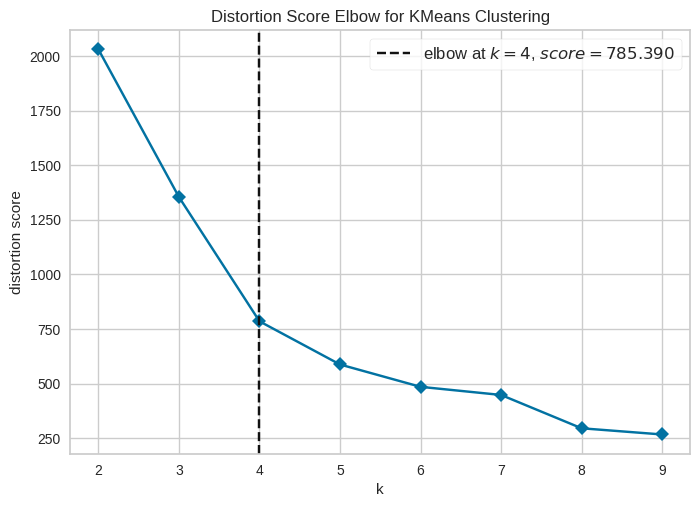

In [88]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Removing the 'Day' column as it's not relevant for clustering
data_clustering = wide_standardized_noNA.drop('Day', axis=1)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 'auto', random_state=123)
    kmeans.fit(data_clustering)
    wcss.append(kmeans.inertia_)

kmeans = KMeans(init='k-means++', n_init='auto', random_state=123)
visualizer = KElbowVisualizer(kmeans, k=(2,10), timings=False)
visualizer.fit(data_clustering)
visualizer.show()
plt.show()

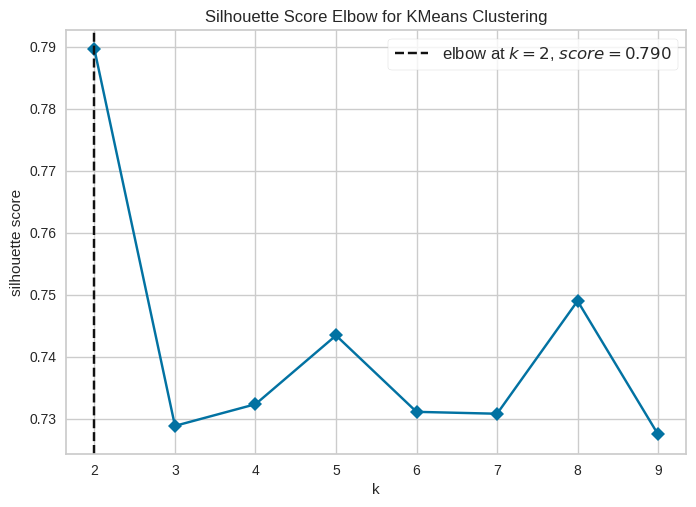

In [91]:
kmeans = KMeans(init='k-means++', n_init='auto', random_state=123)
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette', timings=False)
visualizer.fit(data_clustering)
visualizer.show()
plt.show()

Cluster days together using DBSCAN

In [123]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
import numpy as np

eps_values = np.arange(4,9,0.25) # eps values to be investigated
min_samples = np.arange(2,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(data_clustering)
    sil_score.append(silhouette_score(data_clustering, DBS_clustering.labels_))

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
pivot_1

Eps,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.00,7.25,7.50,7.75,8.00,8.25,8.50,8.75
Min_samples,,,,,,,,,,,,,,,,,,,,
2,0.801339,0.801339,0.802312,0.802312,0.802312,0.802312,0.723542,0.723542,0.723542,0.723542,0.826568,0.826568,0.826568,0.826568,0.826568,0.826568,0.826568,0.826568,0.872686,0.872686
3,0.796972,0.796972,0.797752,0.797752,0.797752,0.797752,0.784130,0.784130,0.784130,0.784130,0.826568,0.826568,0.826568,0.826568,0.826568,0.826568,0.826568,0.826568,0.872686,0.872686
4,0.796972,0.796972,0.797752,0.797752,0.797752,0.797752,0.784130,0.784130,0.784130,0.784130,0.805009,0.805009,0.805009,0.805009,0.826568,0.826568,0.826568,0.826568,0.872686,0.872686
5,0.796972,0.796972,0.797752,0.797752,0.797752,0.797752,0.784130,0.784130,0.784130,0.784130,0.805009,0.805009,0.805009,0.805009,0.805009,0.826568,0.826568,0.826568,0.872686,0.872686
6,0.796972,0.796972,0.797752,0.797752,0.797752,0.797752,0.784130,0.784130,0.784130,0.784130,0.805009,0.805009,0.805009,0.805009,0.805009,0.826568,0.826568,0.826568,0.872686,0.872686
7,0.796972,0.796972,0.797752,0.797752,0.797752,0.797752,0.784130,0.784130,0.784130,0.784130,0.805009,0.805009,0.805009,0.805009,0.805009,0.805009,0.826568,0.826568,0.872686,0.872686
8,0.796972,0.796972,0.797752,0.797752,0.797752,0.797752,0.784130,0.784130,0.784130,0.784130,0.805009,0.805009,0.805009,0.805009,0.805009,0.805009,0.826568,0.826568,0.872686,0.872686
9,0.796972,0.796972,0.797752,0.797752,0.797752,0.797752,0.784130,0.784130,0.784130,0.784130,0.805009,0.805009,0.805009,0.805009,0.805009,0.805009,0.826568,0.826568,0.872686,0.872686


In [112]:
# DBSCAN clustering
# We need to specify the epsilon (eps) and minimum samples (min_samples) parameters
# As a starting point, we can use default values and adjust them based on the results
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(data_clustering)

# Adding the cluster labels to the original dataframe for analysis
data_with_dbscan = wide_standardized_noNA.copy()
data_with_dbscan['DBSCAN_Cluster'] = clusters_dbscan

# Checking the number of clusters and points in each cluster
cluster_counts = data_with_dbscan['DBSCAN_Cluster'].value_counts()

Pairs plots

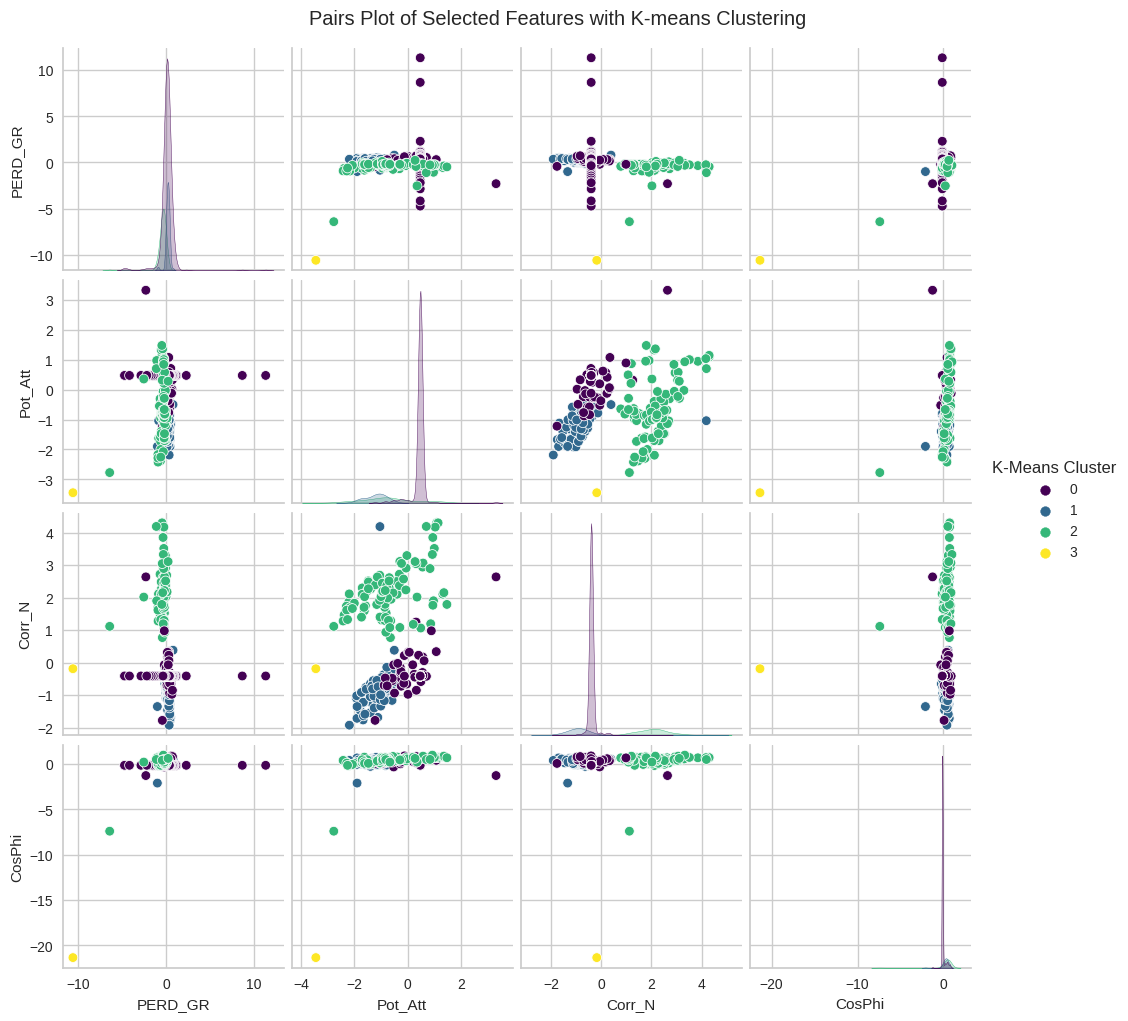

In [120]:
plotting_df = wide_standardized_noNA.copy()

plotting_df['Pot_Att'] = plotting_df[pot_variables].sum(axis=1)
plotting_df['Corr_N'] = plotting_df[trN_variables].sum(axis=1)
plotting_df['CosPhi'] = plotting_df[cosfi].sum(axis=1)
plotting_df.drop(pot_variables+trN_variables+cosfi, axis=1, inplace=True)

kmeans_max_asw = KMeans(n_clusters=4, init='k-means++', n_init = 'auto', random_state=123)
plotting_df['K-Means Cluster'] = kmeans_max_asw.fit_predict(data_clustering)

sns.pairplot(plotting_df, hue='K-Means Cluster', palette='viridis')
plt.suptitle('Pairs Plot of Selected Features with K-means Clustering', y=1.02)
plt.show()

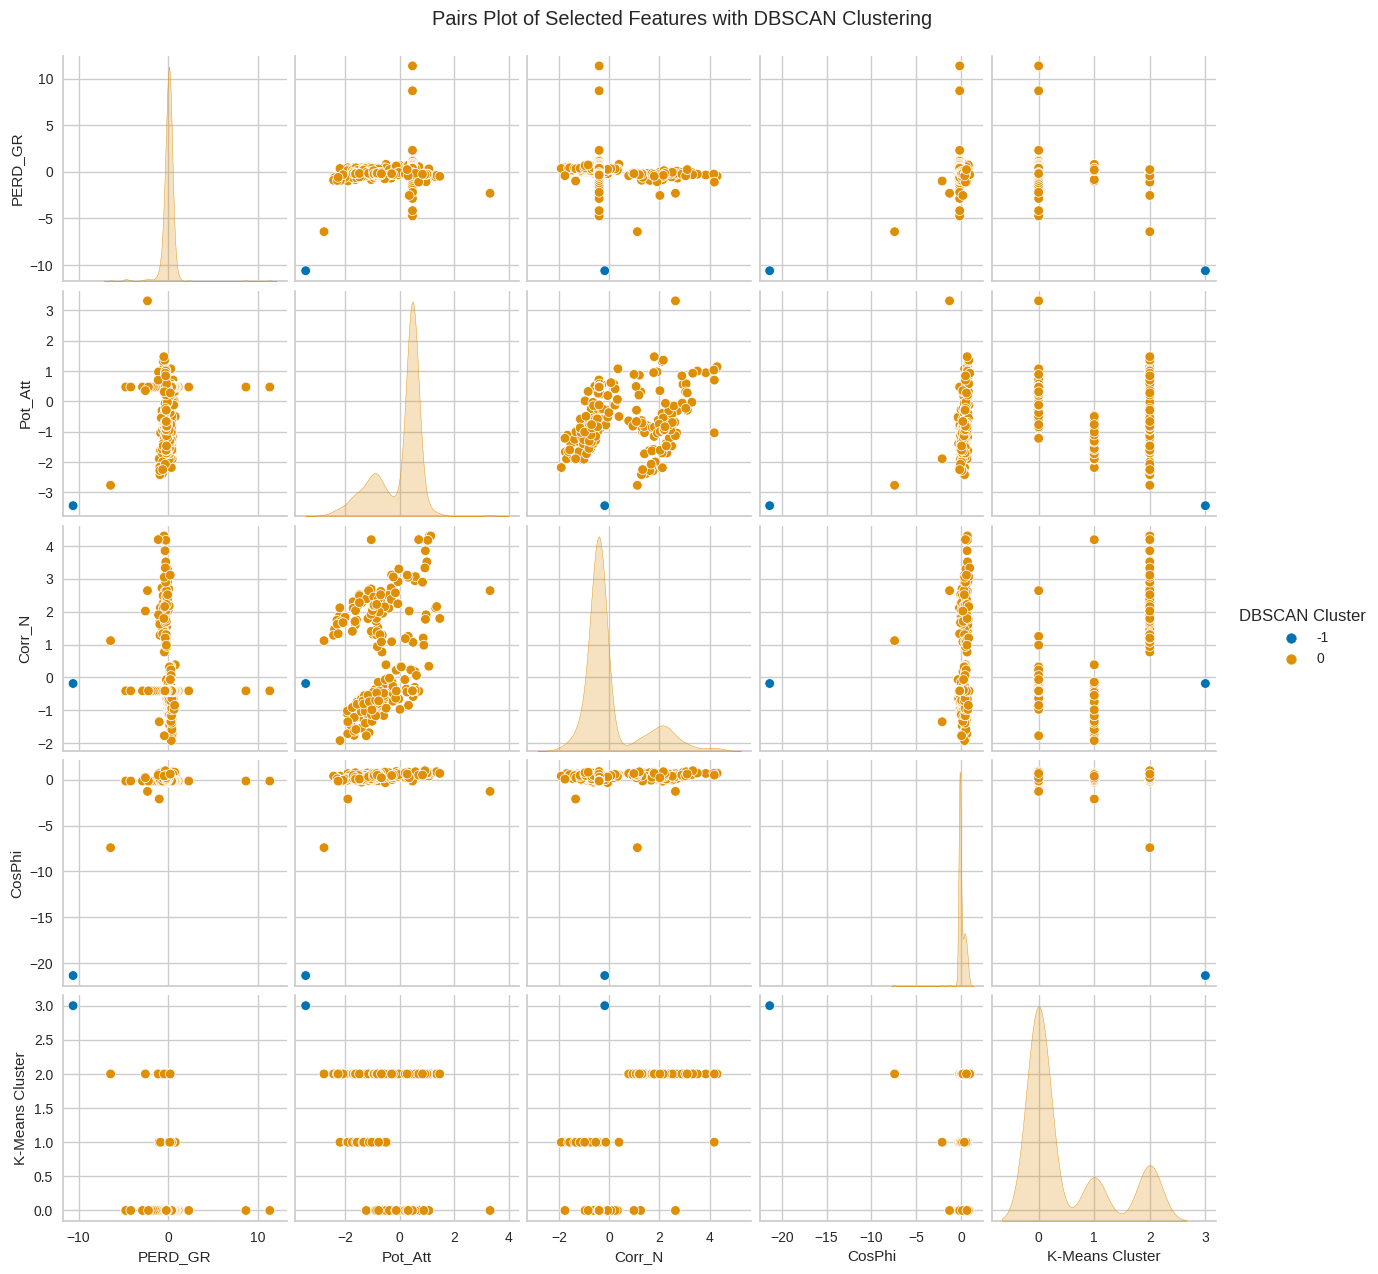

In [124]:
dbscan = DBSCAN(eps=8.5)
plotting_df['DBSCAN Cluster'] = dbscan.fit_predict(data_clustering)

sns.pairplot(plotting_df, hue='DBSCAN Cluster', palette='colorblind')
plt.suptitle('Pairs Plot of Selected Features with DBSCAN Clustering', y=1.02)
plt.show()